In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Sarthak Jain\\Desktop\\datasets\\5-indian_food.csv")

In [3]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
df.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [5]:
df.shape

(255, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [9]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [10]:
print(df.nunique())

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      5
course              4
state              25
region              7
dtype: int64


In [11]:
print(df['diet'].unique())
print(df['flavor_profile'].unique())
print(df['course'].unique())
print(df['region'].unique())
print(df['state'].unique())

['vegetarian' 'non vegetarian']
['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'starter' 'snack']
['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']


In [12]:
ingredients = []

for row in range(len(df)):
    ing = df['ingredients'][row].replace(" ", "").split(',')
    ingredients.append(ing)
    
df['ingredients'] = ingredients
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [13]:
df[df['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"[Wholewheatflour, muskmelonseeds, poppyseeds, ...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [14]:
df[df['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"[Maida, cornflour, bakingsoda, vinegar, curd, ...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"[Firmwhitepumpkin, sugar, kitchenlime, alumpow...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"[Condensedmilk, sugar, spices, nuts]",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"[Cornflour, ghee, dryfruits]",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"[Moongdal, rava, garammasala, dough, fennelseeds]",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"[Paneer, potato, cream, cornflour, garammasala]",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"[Bottlegourd, garammasalapowder, gramflour, gi...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"[Greenbeans, potatoes, khuskhus, lowfat, garam...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"[Wholewheatflour, muskmelonseeds, poppyseeds, ...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [15]:
df['region'] = df['region'].replace(np.nan, 'North')
df[df['state'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [16]:
df['prep_time'] = df['prep_time'].replace(-1, 0)
df['cook_time'] = df['cook_time'].replace(-1, 0)
df['flavor_profile'] = df['flavor_profile'].replace('-1', 'others')
df['region'] = df['region'].replace('-1', 'Others')
df['state'] = df['state'].replace('-1', 'Others')

print(df['flavor_profile'].unique())
print(df['region'].unique())
print(df['state'].unique())
print(df.describe())

['sweet' 'spicy' 'bitter' 'others' 'sour']
['East' 'West' 'North' 'Others' 'North East' 'South' 'Central']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' 'Others' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
        prep_time   cook_time
count  255.000000  255.000000
mean    31.223529   34.639216
std     72.502844   48.185452
min      0.000000    0.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [17]:
#Analysis

In [18]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [21]:
#creating new column
df['total_time']=df['prep_time']+df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


<AxesSubplot:xlabel='prep_time', ylabel='cook_time'>

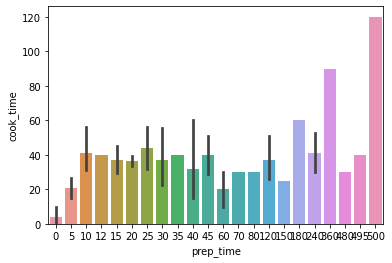

In [23]:
sns.barplot(x='prep_time',y='cook_time',data=df)

<AxesSubplot:xlabel='diet', ylabel='total_time'>

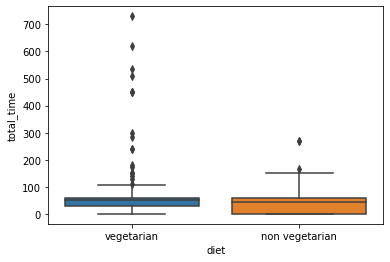

In [24]:
sns.boxplot(x='diet',y='total_time',data=df)

<AxesSubplot:xlabel='region', ylabel='total_time'>

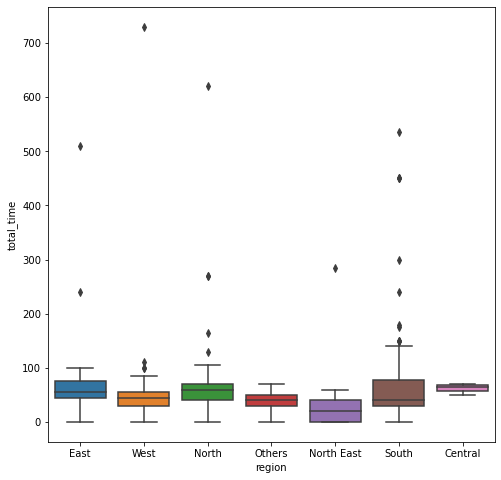

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(x='region',y='total_time',data=df) 



<AxesSubplot:xlabel='flavor_profile', ylabel='total_time'>

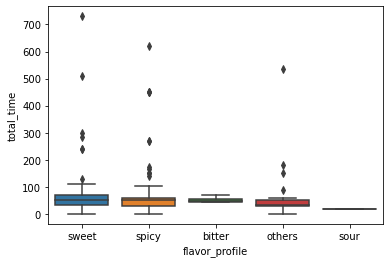

In [27]:
sns.boxplot(x='flavor_profile',y='total_time',data=df)

In [33]:
df1=df.corr()

In [34]:
df1

,prep_time,cook_time,total_time
prep_time,1.000000,0.142407,0.857133
cook_time,0.142407,1.000000,0.631907
total_time,0.857133,0.631907,1.000000


<AxesSubplot:>

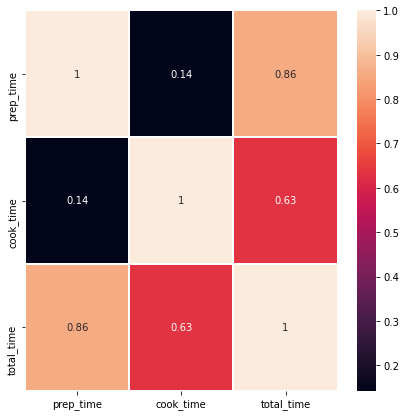

In [36]:
plt.figure(figsize=(7,7))
sns.heatmap(df1,annot=True,linecolor='White',linewidth=1)

<AxesSubplot:xlabel='diet', ylabel='count'>

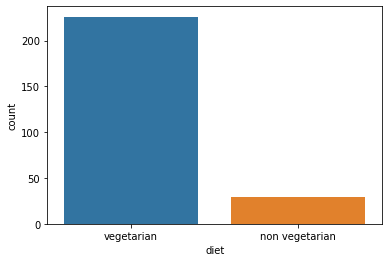

In [37]:
sns.countplot(x='diet',data=df)

<AxesSubplot:xlabel='flavor_profile', ylabel='count'>

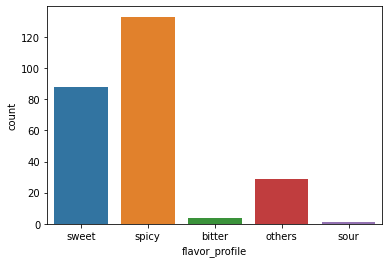

In [38]:
sns.countplot(x='flavor_profile',data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

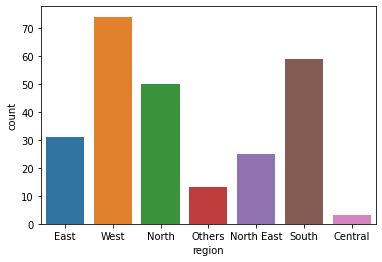

In [39]:
sns.countplot(x='region',data=df)

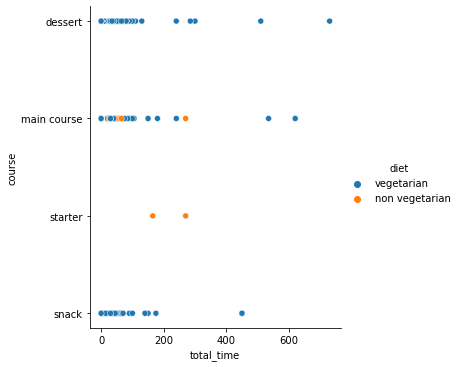

In [42]:
sns.relplot(x='total_time',y='course',hue='diet',kind='scatter',cmap='winter',data=df)

In [43]:
data=df.select_dtypes(include=['float64','int64'])

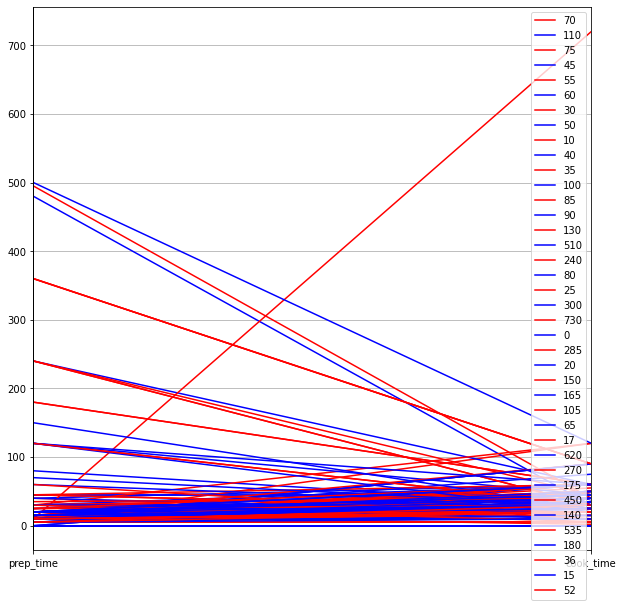

In [47]:
plt.figure(figsize=(10,10))
_=pd.plotting.parallel_coordinates(data,class_column='total_time',color=('red','blue'))

D:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\python\lib\site-packages\seaborn\distributions.py:306: UserWa

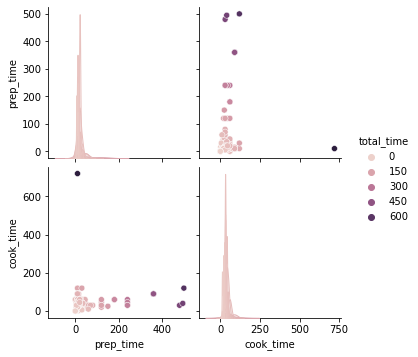

In [48]:
sns.pairplot(df,vars=('prep_time','cook_time'),hue='total_time')